<center><h1>Image resizing, RGB to gray and histogram equalisation</h1></center>

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Image 1</h1>

In [ ]:
image = cv2.imread('lena.png') #Replace with your image path
cv2.imshow('Lena',image)
cv2.waitKey(0)
cv2.destroyAllWindows()

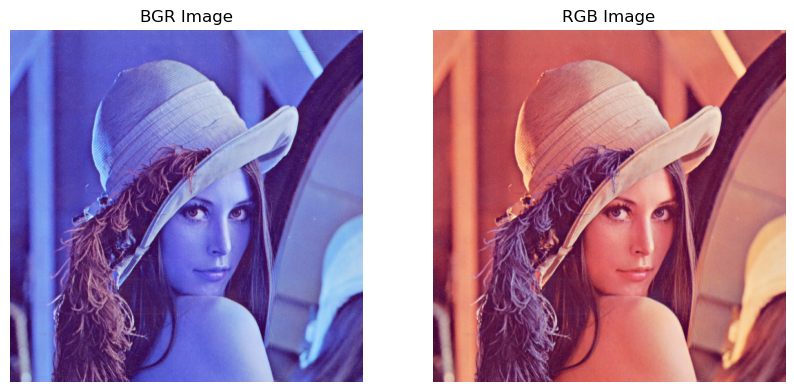

In [7]:
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(image)
axis[0].axis('off')
axis[0].set_title('BGR Image')
axis[1].imshow(rgb_img)
axis[1].axis('off')
axis[1].set_title('RGB Image')
plt.show()

<h1>Gray Scaling Using Inbuilt Function</h1>

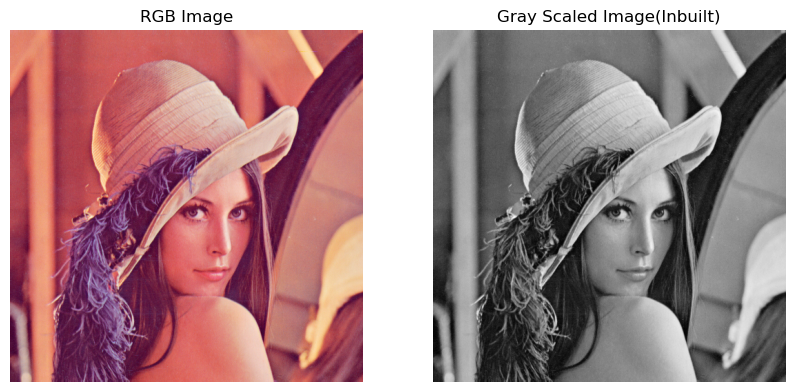

In [8]:
gray_image = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(rgb_img)
axis[0].axis('off')
axis[0].set_title('RGB Image')
axis[1].imshow(gray_image, cmap='gray')
axis[1].axis('off')
axis[1].set_title('Gray Scaled Image(Inbuilt)')
plt.show()

<h1>Gray Scaling image using Manual method</h1>

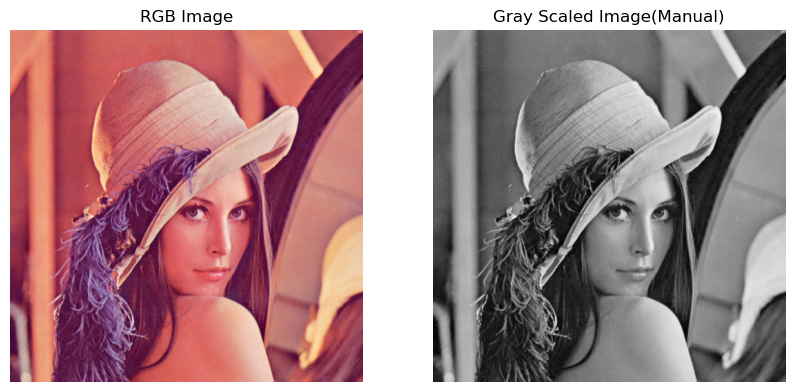

In [9]:
(row, col) = rgb_img.shape[0:2]
gray_scaled_img = np.zeros((row,col),dtype = np.uint8)
for i in range(row):
    for j in range(col):
        R, G, B = rgb_img[i,j]
        gray_scaled_img[i,j] = int(0.299 * R + 0.587 * G + 0.114 * B)

fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(rgb_img)
axis[0].axis('off')
axis[0].set_title('RGB Image')
axis[1].imshow(gray_scaled_img,cmap='gray')
axis[1].axis('off')
axis[1].set_title('Gray Scaled Image(Manual)')
plt.show()

<h1>Histogram Equalization using Inbuilt Function</h1>

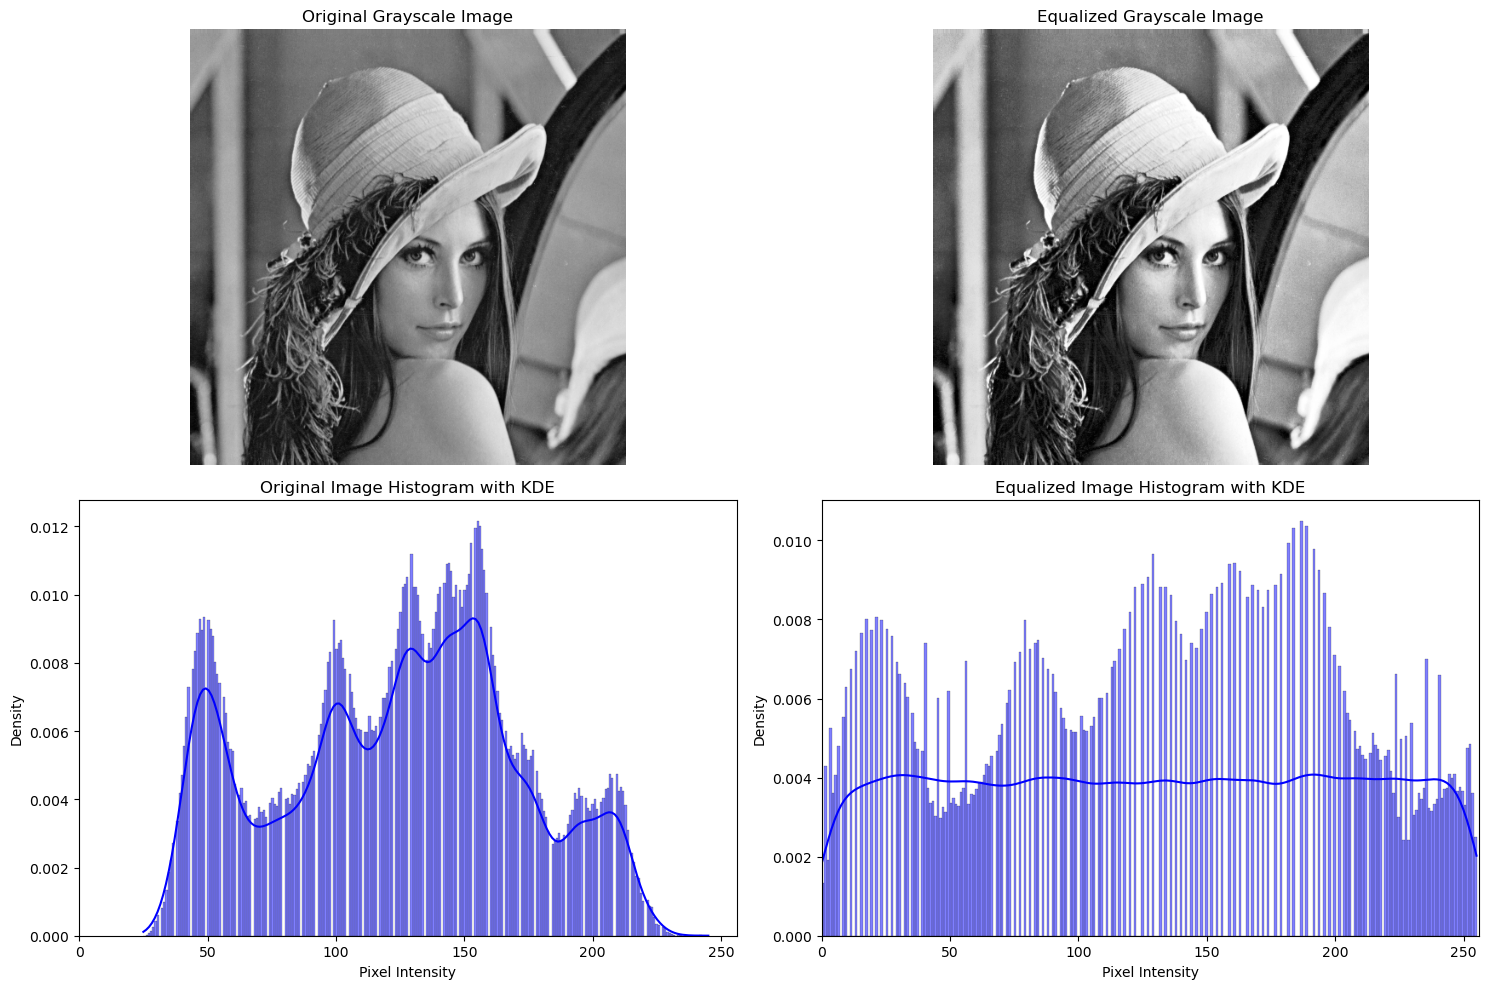

In [10]:
equalized_image = cv2.equalizeHist(gray_image)

original_img_flat = gray_image.ravel()
equalized_img_flat = equalized_image.ravel()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title('Equalized Grayscale Image')

plt.subplot(2, 2, 3)
sns.histplot(original_img_flat, bins=256, kde=True, stat='density', color='blue')
plt.title('Original Image Histogram with KDE')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.histplot(equalized_img_flat, bins=256, kde=True, stat='density', color='blue')
plt.title('Equalized Image Histogram with KDE')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<h1>Manual Histogram equilization </h1>

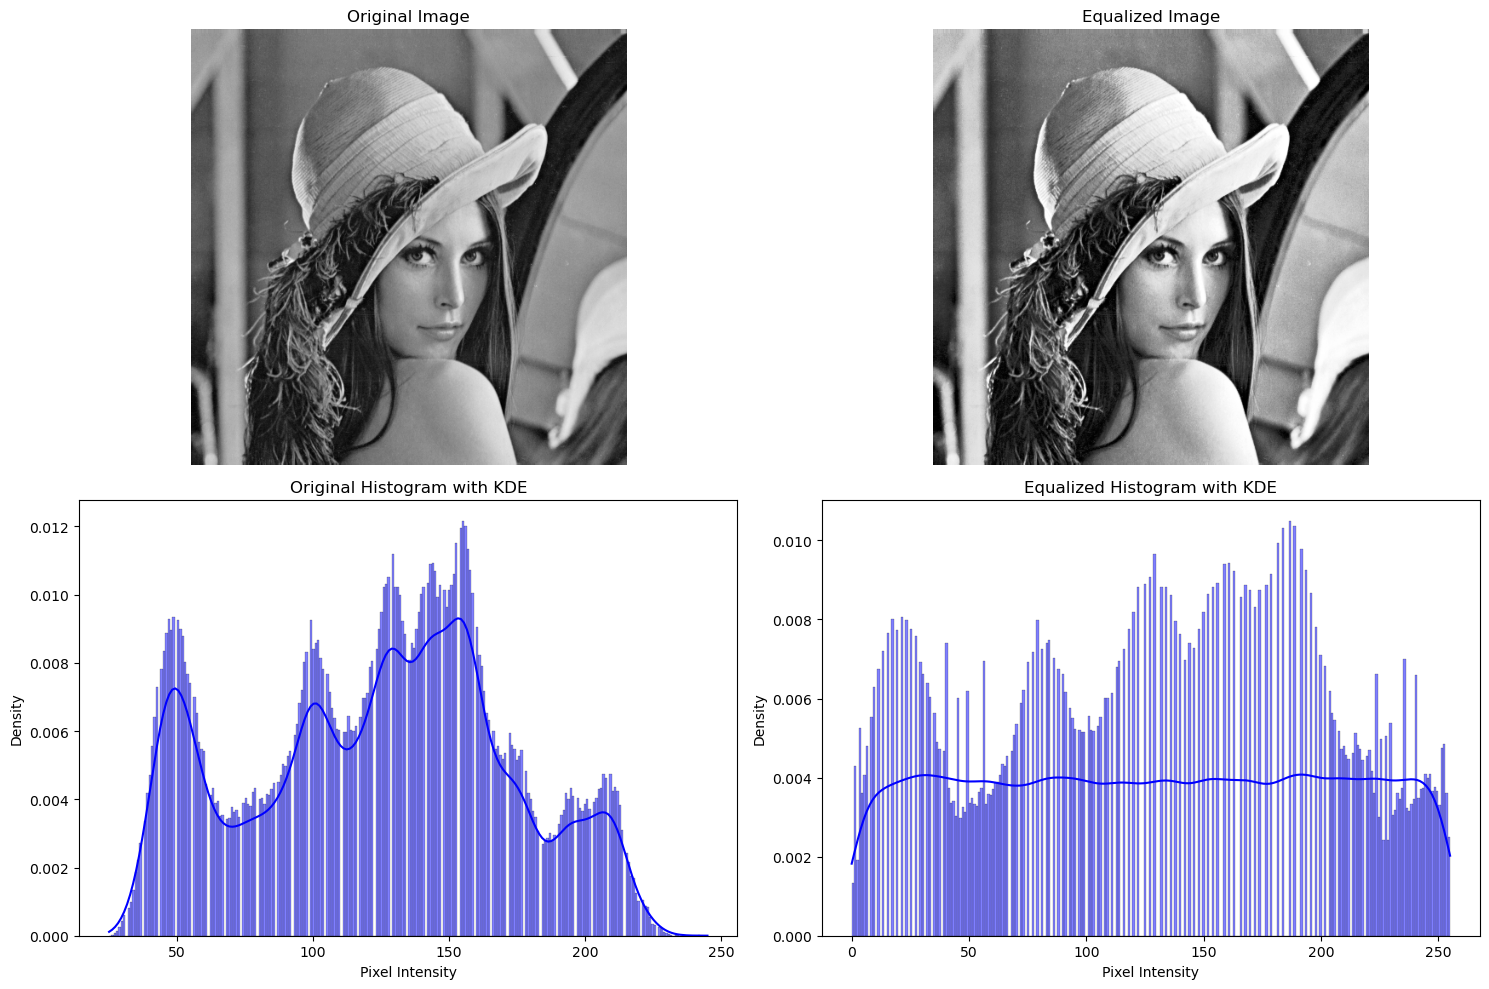

In [11]:
original_hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

hist, bins = np.histogram(gray_image.flatten(), bins=256, range = [0,256])

#Calculating the histogram
pdf = hist/np.sum(hist)

#Calculating the cummulative distribution function
cdf = np.cumsum(pdf)
cdf_normalized = cdf *255 #scaling the range[0,255]

#Maping old intensities to the new ones
equalized_image = cdf_normalized[gray_image]

#converting to uint8
equalized_image = np.round(equalized_image).astype('uint8')

# Calculate the histogram of the equalized image
equalized_hist, bins = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

#KDE Visualization
plt.figure(figsize=(15, 10))

# Original Histogram + KDE
plt.subplot(2, 2, 3)
plt.title("Original Histogram with KDE")
sns.histplot(gray_image.flatten(), bins=256, kde=True, color='blue', stat="density")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")

# Equalized Histogram + KDE
plt.subplot(2, 2, 4)
plt.title("Equalized Histogram with KDE")
sns.histplot(equalized_image.flatten(), bins=256, kde=True, color='blue', stat="density")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Equalized Image
plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Resizing the image</h1>

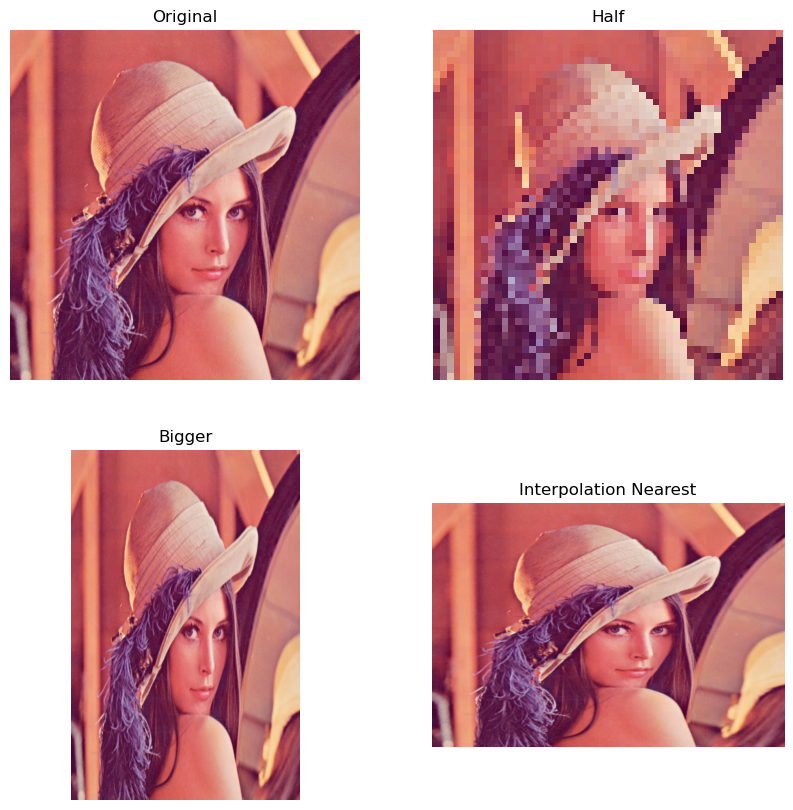

In [12]:
half = cv2.resize(rgb_img, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(rgb_img, (1050, 1610))

stretch_near = cv2.resize(rgb_img, (780, 540), 
               interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[rgb_img, half, bigger, stretch_near]
count = 4

plt.figure(figsize=(10,10))
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.show()

<h1>Image 2</h1>

In [ ]:
image = cv2.imread('nature.jpeg') #Replace with your image path
cv2.imshow('Nature', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

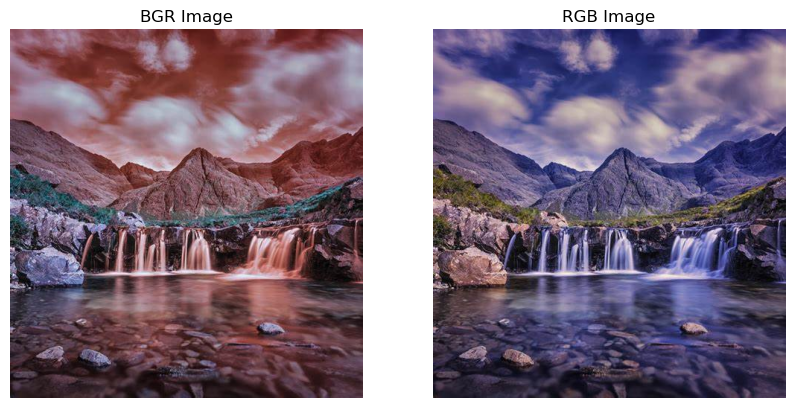

In [14]:
rgb_img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(image)
axis[0].axis('off')
axis[0].set_title('BGR Image')
axis[1].imshow(rgb_img)
axis[1].axis('off')
axis[1].set_title('RGB Image')
plt.show()

<h1>Gray Scaling using inbuilt function</h1>

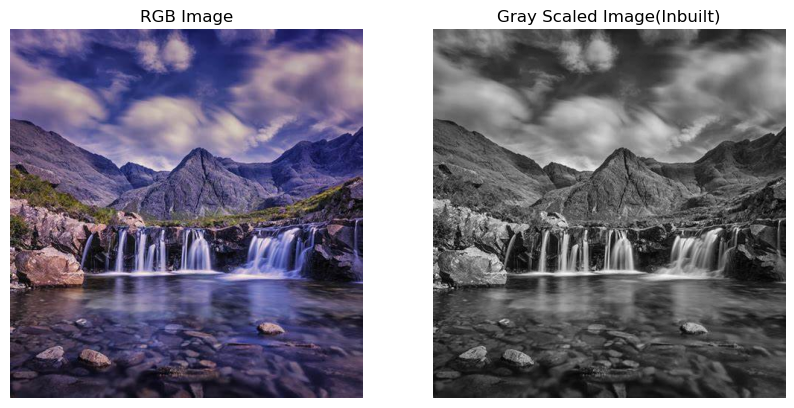

In [15]:
gray_image = cv2.cvtColor(rgb_img,cv2.COLOR_RGB2GRAY)
fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(rgb_img)
axis[0].axis('off')
axis[0].set_title('RGB Image')
axis[1].imshow(gray_image, cmap='gray')
axis[1].axis('off')
axis[1].set_title('Gray Scaled Image(Inbuilt)')
plt.show()

<h1>Manual Gray Scaling</h1>

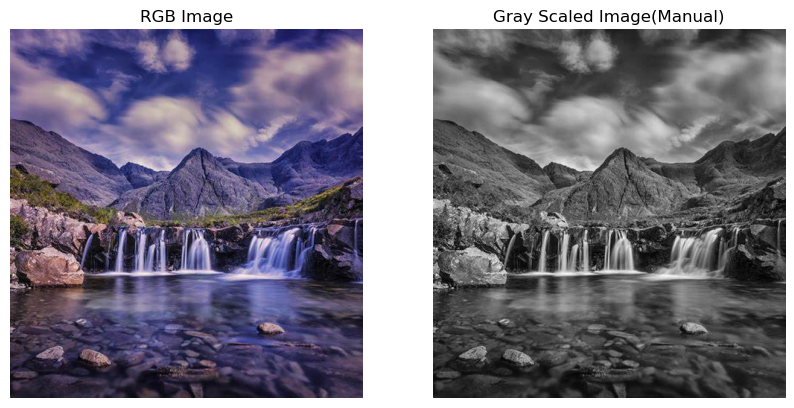

In [16]:
(row, col) = rgb_img.shape[0:2]
gray_scaled_img = np.zeros((row,col),dtype = np.uint8)
for i in range(row):
    for j in range(col):
        R, G, B = rgb_img[i,j]
        gray_scaled_img[i,j] = int(0.299 * R + 0.587 * G + 0.114 * B)

fig, axis = plt.subplots(1, 2, figsize=(10,10))
axis[0].imshow(rgb_img)
axis[0].axis('off')
axis[0].set_title('RGB Image')
axis[1].imshow(gray_scaled_img,cmap='gray')
axis[1].axis('off')
axis[1].set_title('Gray Scaled Image(Manual)')
plt.show()

<h1>Histogram Equalization using inbuilt function</h1>

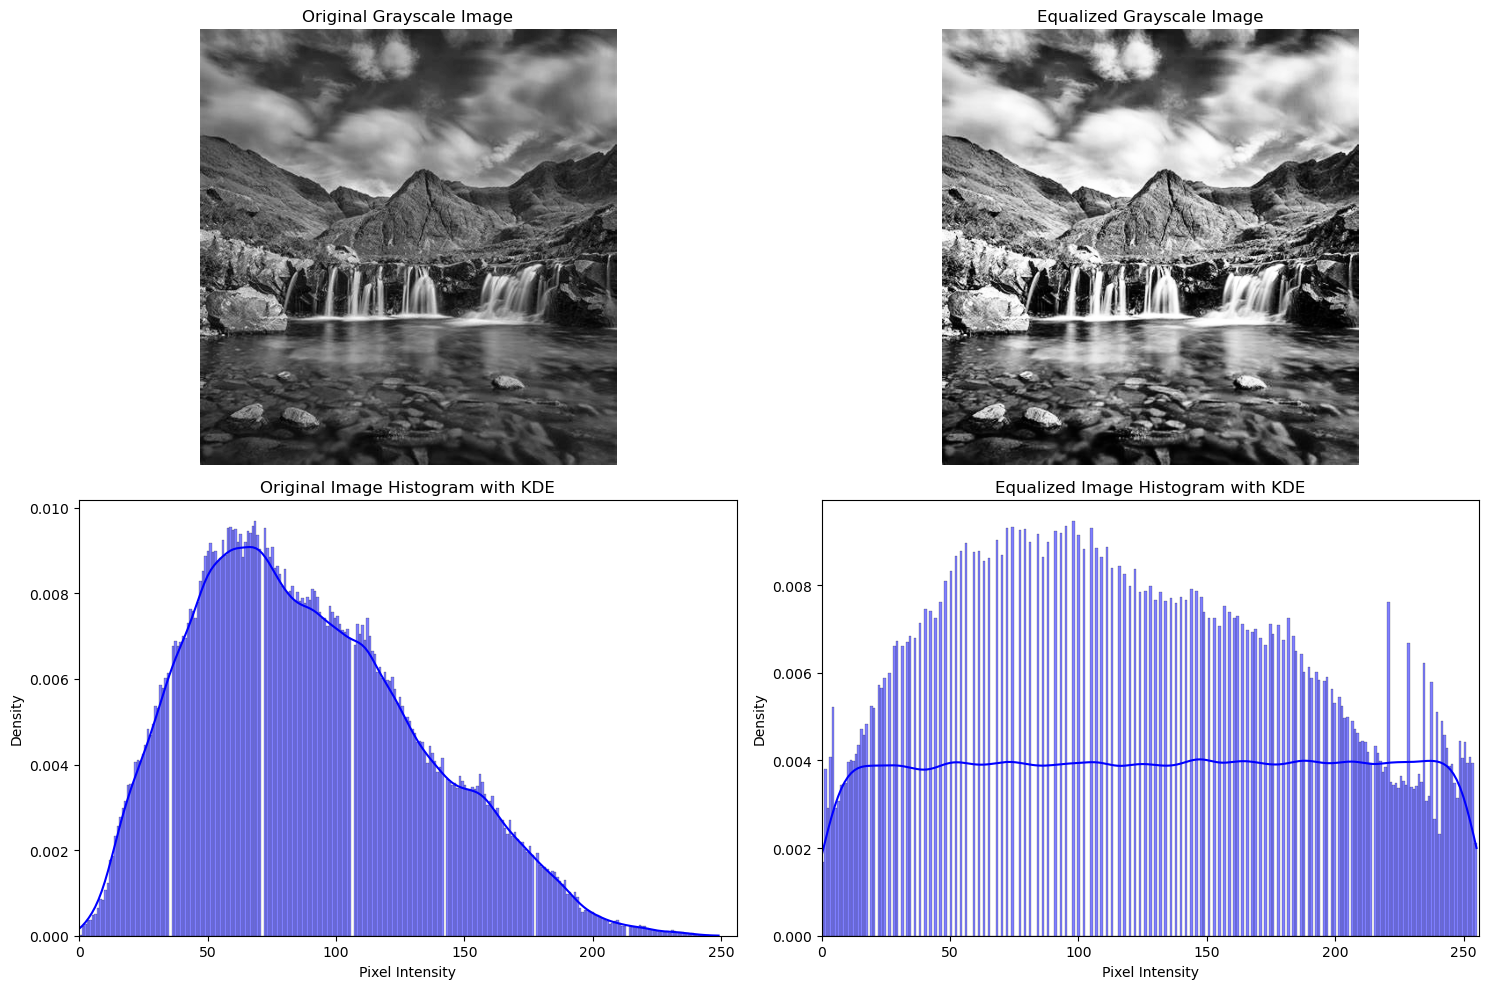

In [17]:
equalized_image = cv2.equalizeHist(gray_image)

original_img_flat = gray_image.ravel()
equalized_img_flat = equalized_image.ravel()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.title('Equalized Grayscale Image')

plt.subplot(2, 2, 3)
sns.histplot(original_img_flat, bins=256, kde=True, stat='density', color='blue')
plt.title('Original Image Histogram with KDE')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.histplot(equalized_img_flat, bins=256, kde=True, stat='density', color='blue')
plt.title('Equalized Image Histogram with KDE')
plt.xlim([0, 256])
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

<h1>Manual Histogram equalization</h1>

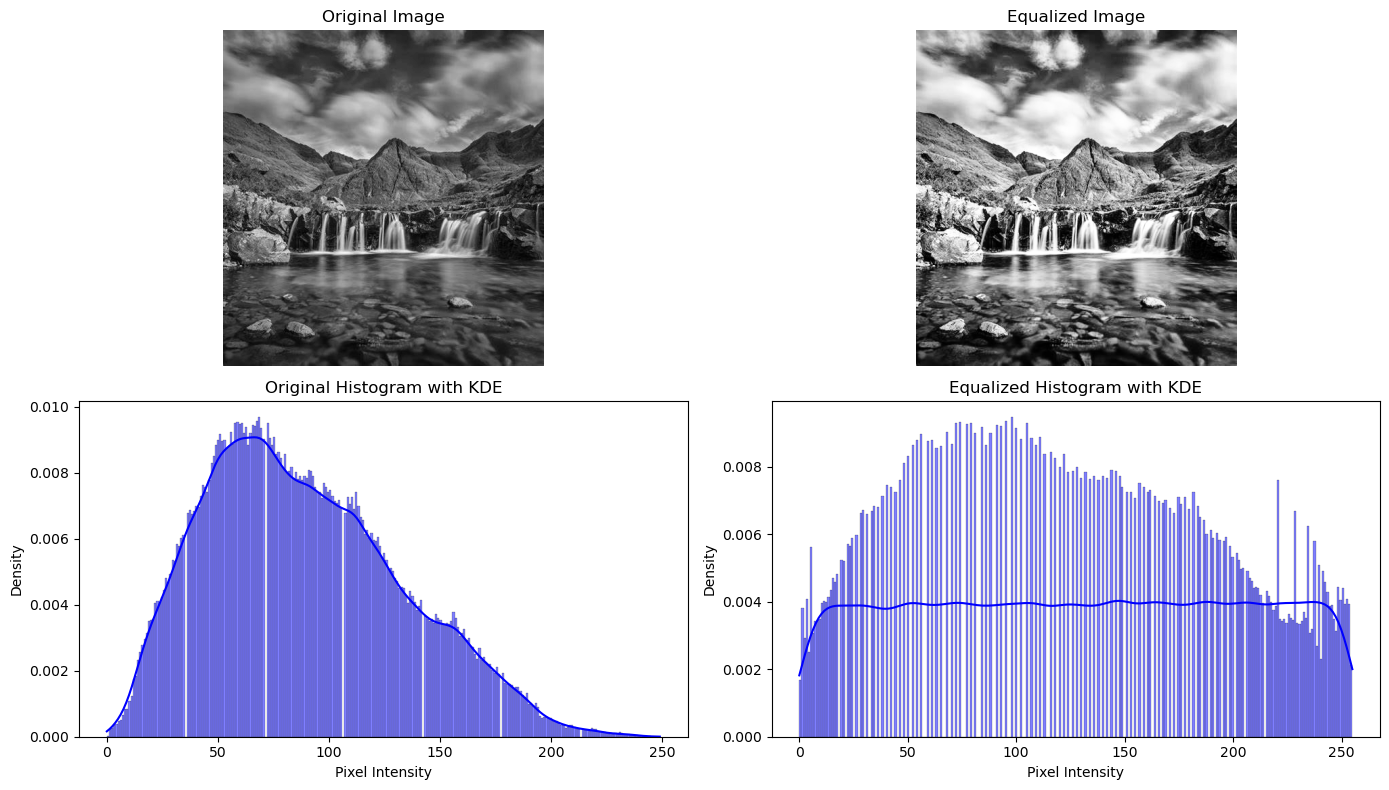

In [18]:
original_hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

hist, bins = np.histogram(gray_image.flatten(), bins=256, range = [0,256])

#Calculating the histogram
pdf = hist/np.sum(hist)

#Calculating the cummulative distribution function
cdf = np.cumsum(pdf)
cdf_normalized = cdf *255 #scaling the range[0,255]

#Maping old intensities to the new ones
equalized_image = cdf_normalized[gray_image]

#converting to uint8
equalized_image = np.round(equalized_image).astype('uint8')

# Calculate the histogram of the equalized image
equalized_hist, bins = np.histogram(equalized_image.flatten(), bins=256, range=[0, 256])

#KDE Visualization
plt.figure(figsize=(14, 8))

# Original Histogram + KDE
plt.subplot(2, 2, 3)
plt.title("Original Histogram with KDE")
sns.histplot(gray_image.flatten(), bins=256, kde=True, color='blue', stat="density")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")

# Equalized Histogram + KDE
plt.subplot(2, 2, 4)
plt.title("Equalized Histogram with KDE")
sns.histplot(equalized_image.flatten(), bins=256, kde=True, color='blue', stat="density")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

# Equalized Image
plt.subplot(2, 2, 2)
plt.title("Equalized Image")
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

<h1>Resizing the image</h1>

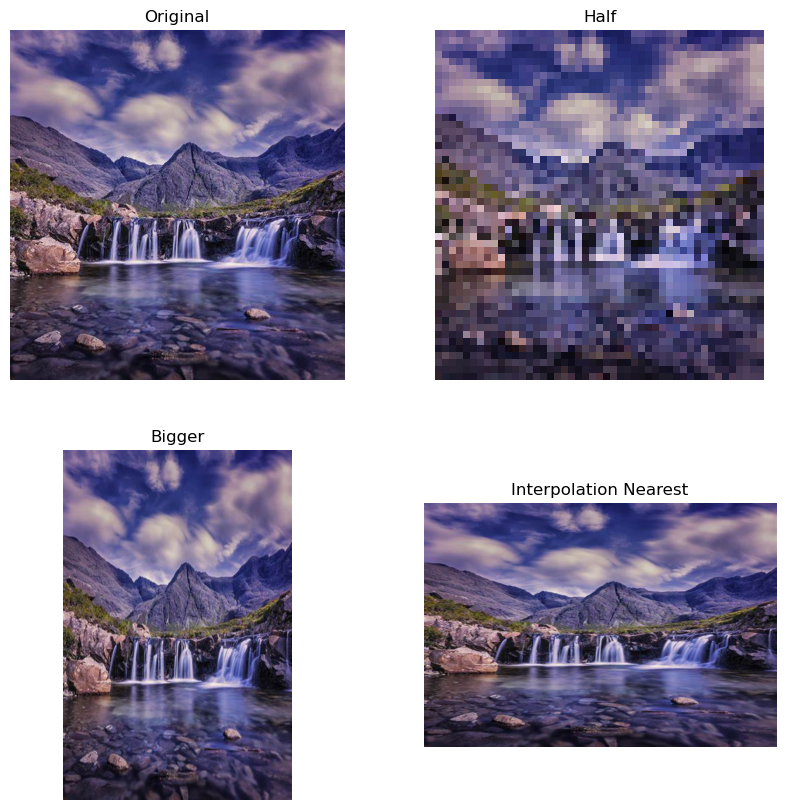

In [19]:
half = cv2.resize(rgb_img, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(rgb_img, (1050, 1610))

stretch_near = cv2.resize(rgb_img, (780, 540), 
               interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[rgb_img, half, bigger, stretch_near]
count = 4

plt.figure(figsize=(10,10))
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
plt.show()